In [1]:
from tools import SourceFunctions
from interface import SpectraInterface
import numpy as np
import matplotlib.pyplot as plt
from fieldmaptrack import Beam

### Generate a field defined by user

[ 1968.23800031  3936.47600062  5904.71400093  7872.95200124
  9841.19000155 11809.42800186 13777.66600217 15745.90400248
 17714.14200279]


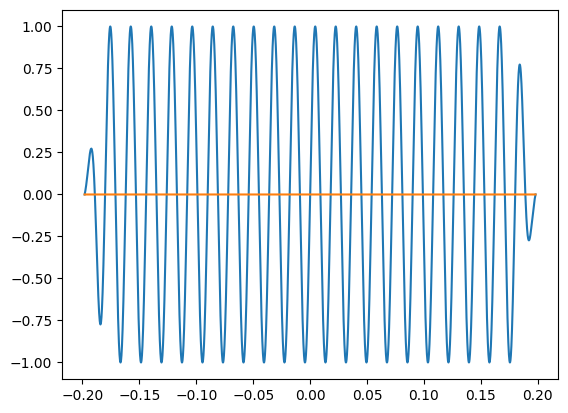

In [2]:
beam = Beam(3)
gamma = beam.gamma

sf = SourceFunctions()
period = 18
bx_peak = 0
by_peak = 1

field = sf.create_field_profile(20, period, bx_peak, by_peak, 201)

kx = sf.undulator_b_to_k(bx_peak, period)
ky = sf.undulator_b_to_k(by_peak, period)
k = np.sqrt(kx**2 + ky**2)
theta = 0.0
n = np.arange(1, 10, 1)
energy = sf.get_harmonic_energy(n, gamma, theta, period, k)
print(energy)

rz = field[:, 0]
bx = field[:, 1]
by = field[:, 2]

plt.plot(rz, bx)
plt.plot(rz, by)

### Create an object to calc flux

In [3]:
spectra = SpectraInterface()

spectra.accelerator.set_low_beta_section()

#  Select source defined by user
spectra.calc_flux.source_type = spectra.calc_flux.CalcConfigs.SourceType.user_defined

spectra.calc_flux.field = field
spectra.calc_flux.indep_var = spectra.calc_flux.CalcConfigs.Variable.energy
spectra.calc_flux.energy_range = [1, 15000]
spectra.calc_flux.energy_step = 10
spectra.calc_flux.observation_position = [0, 0]

# Set configuration
spectra.calc_flux.set_config()
spectra.calc_flux.run_calculation()

Calculation Status: elapsed time: 1.2 s


Text(0, 0.5, 'ph/s/mm^2/0.1%B.W.')

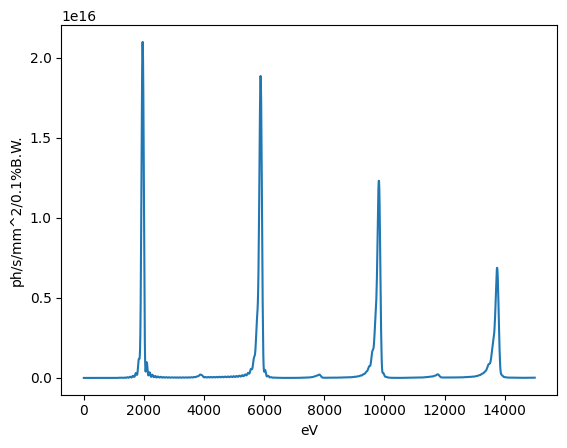

In [4]:
plt.plot(spectra.calc_flux.output_variables[0, :], spectra.calc_flux.output_data[0, :])
plt.xlabel(spectra.calc_flux.output_captions['units'][0])
plt.ylabel(spectra.calc_flux.output_captions['units'][1])

In [5]:
spectra.calc_flux.output_type = spectra.calc_flux.CalcConfigs.Output.flux
spectra.calc_flux.slit_shape = spectra.calc_flux.CalcConfigs.SlitShape.circular
spectra.calc_flux.slit_acceptance = [0, 0.04]
spectra.calc_flux.set_config()
spectra.calc_flux.run_calculation()


elapsed time: 1.4 s


Text(0, 0.5, 'ph/s/0.1%B.W.')

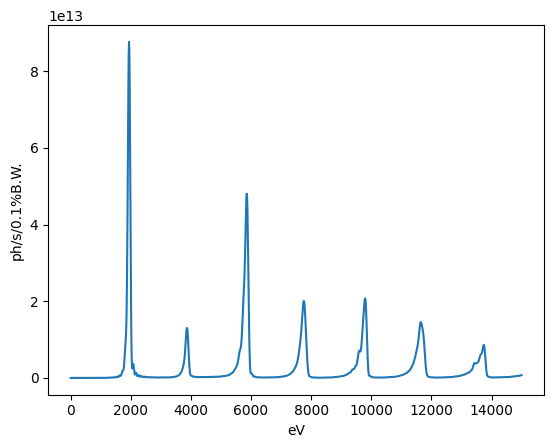

In [6]:
plt.plot(spectra.calc_flux.output_variables[0, :], spectra.calc_flux.output_data[0, :])
plt.xlabel(spectra.calc_flux.output_captions['units'][0])
plt.ylabel(spectra.calc_flux.output_captions['units'][1])